In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
## matplotlib.rcParams['figure.figsize'] = (12,8)

### Import necessary files

In [2]:
df1 = pd.read_excel('2019 Revenue Vehicle Inventory.xlsx', index_col=None)

In [69]:
df1 = pd.read_excel('2019 Revenue Vehicle Inventory.xlsx', index_col=None)
df2 = pd.read_excel('2019 Facility Inventory.xlsx', index_col=None)
df3 = pd.read_excel('2019 Transit Way Mileage.xlsx', index_col=None)
xls = pd.ExcelFile('Operating Expenses.xlsm')
df4 = pd.read_excel(xls, 'Operating Expenses by Function', index_col = None)

In [146]:
df5 = pd.read_excel('2019 Transit Stations.xlsx', index_col=None)

In [261]:
xls = pd.ExcelFile('Track and Roadway.xlsm')
df7 = pd.read_excel(xls, 'Track by Mode', index_col = None)

In [10]:
pd.set_option("display.max_columns", None)

## How many stations do CTA and other transit agencies have?

In [148]:
## Only need certain transit agencies
df_Stations=df5[df5['NTD ID'].isin([50066, 90154, 10003, 20008, 30019, 30030])]

In [158]:
df_Stations.groupby(['Agency Name', 'Mode']).sum().sort_values(by = ['Agency Name', 'Total Stations'], ascending=False)

NTD ID  ADA Accessible Stations  Non-ADA Accessible Stations  Total Stations  Escalators  Elevators
Agency Name                                        Mode                                                                                                     
Washington Metropolitan Area Transit Authority     HR     30030                     91.0                          0.0              91       618.0      278.0
                                                   MB     60060                      1.0                          0.0               1         0.0        0.0
Southeastern Pennsylvania Transportation Authority CR     30019                     75.0                         80.0             155        22.0       41.0
                                                   HR     30019                     41.0                         34.0              75        36.0       83.0
                                                   SR     30019                      2.0                         54.0              56         1.0        4.0
                                                   MB     60038                      0.0                          0.0               0         0.0        0.0
                                                   TB     30019                      0.0                          0.0               0         0.0        0.0
Massachusetts Bay Transportation Authority         CR     10003                    104.0                         36.0             140        11.0       15.0
                                                   LR     10003                     39.0                         35.0              74        18.0       23.0
                                                   HR     10003                     52.0                          2.0              54       151.0      135.0
                                                   FB     10003                      8.0                          1.0               9         0.0        0.0
                                                   MB     20006                      5.0                          0.0               5         0.0        0.0
                                                   RB     10003                      5.0                          0.0               5         0.0        0.0
                                                   TB     10003                      1.0                          0.0               1         0.0        0.0
MTA New York City Transit                          HR     20008                    120.0                        352.0             472       270.0      309.0
                                                   MB     20008                      2.0                          0.0               2         0.0        0.0
                                                   CB     20008                      0.0                          0.0               0         0.0        0.0
                                                   RB     20008                      0.0                          0.0               0         0.0        0.0
Los Angeles County Metropolitan Transportation ... LR     90154                     79.0                          0.0              79        84.0       40.0
                                                   MB    180308                     44.0                          0.0              44        38.0       10.0
                                                   RB     90154                     17.0                          0.0              17         0.0        0.0
                                                   HR     90154                     16.0                          0.0              16        59.0      111.0
Chicago Transit Authority                          HR     50066                    103.0                         42.0             145       168.0      185.0
                                                   MB     50066                     12.0                          0.0              1

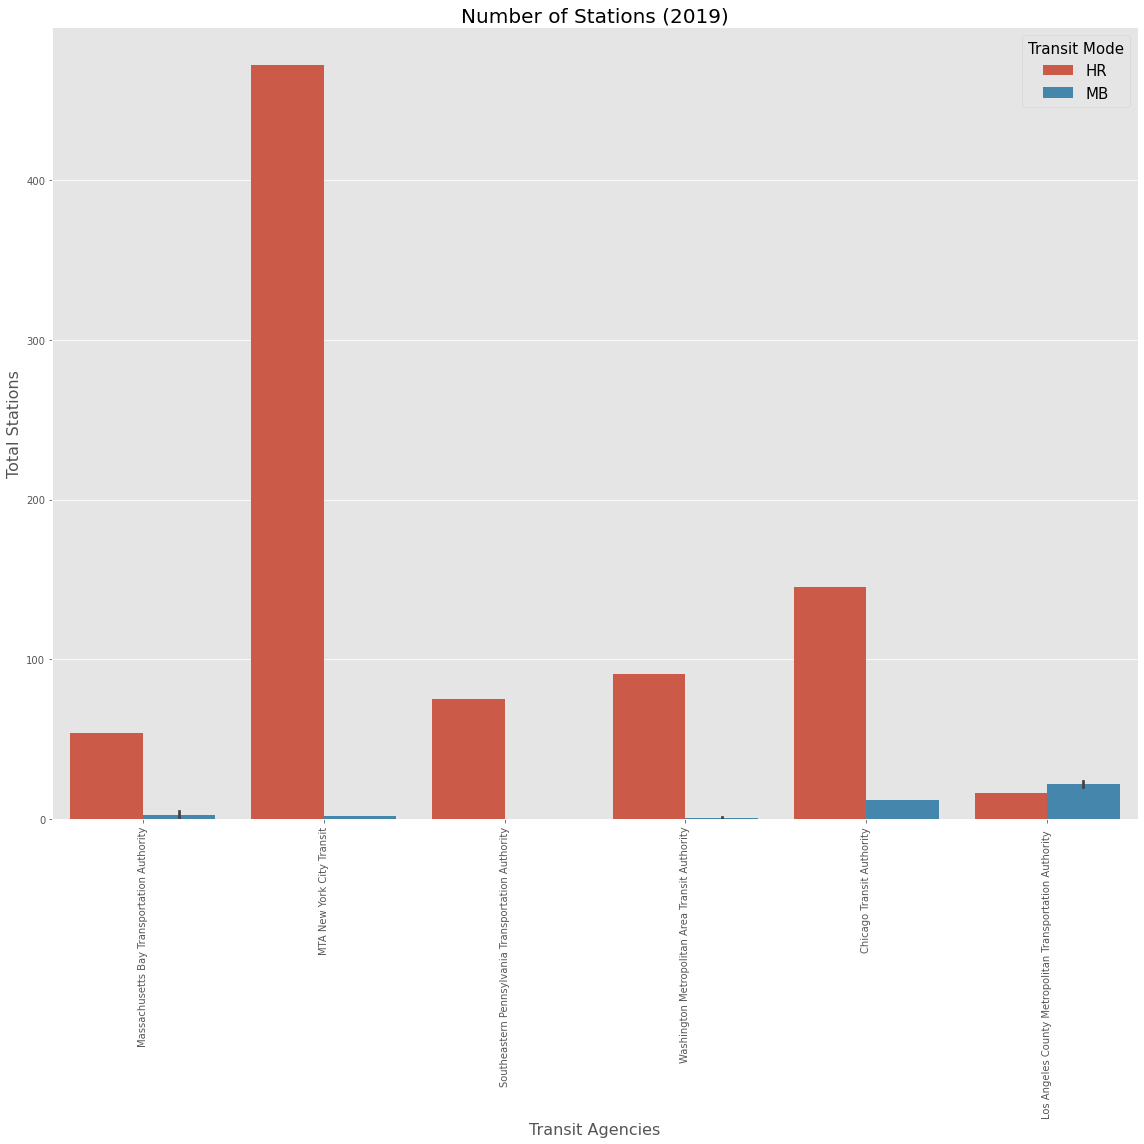

In [285]:
stations = df_Stations[df_Stations['Mode'].isin(['MB', 'HR'])]

plt.figure(figsize = (16,16))
sns.barplot(data = stations, x='Agency Name', y='Total Stations', hue = 'Mode')
plt.title('Number of Stations (2019)', fontsize = 20)
plt.xlabel('Transit Agencies', fontsize = 16)
plt.ylabel('Total Stations', fontsize = 16)
plt.xticks(rotation= 'vertical')
plt.legend(title = 'Transit Mode', fontsize=15, title_fontsize = 15)
plt.tight_layout()

HR(Heavy Rail). MB(Bus). The number of stations for rails outnumbered stations for buses for most transit agencies except LACMTA

## How many miles of track?

In [264]:
df_track_miles=df7[df7['NTD ID'].isin([50066, 90154, 10003, 20008, 30019, 30030])]

In [265]:
df_track_miles.groupby(['Agency', 'Mode']).sum()['Total Track Miles']

Agency                                                                 Mode
Chicago Transit Authority                                              HR      265.14
Los Angeles County Metropolitan Transportation Authority , dba: Metro  HR       42.92
                                                                       LR      192.98
MTA New York City Transit                                              HR      795.85
Massachusetts Bay Transportation Authority                             CR      743.73
                                                                       HR      103.90
                                                                       LR       61.78
Southeastern Pennsylvania Transportation Authority                     CR      608.10
                                                                       HR       99.80
                                                                       SR      217.30
Washington Metropolitan Area Transit Authority                  

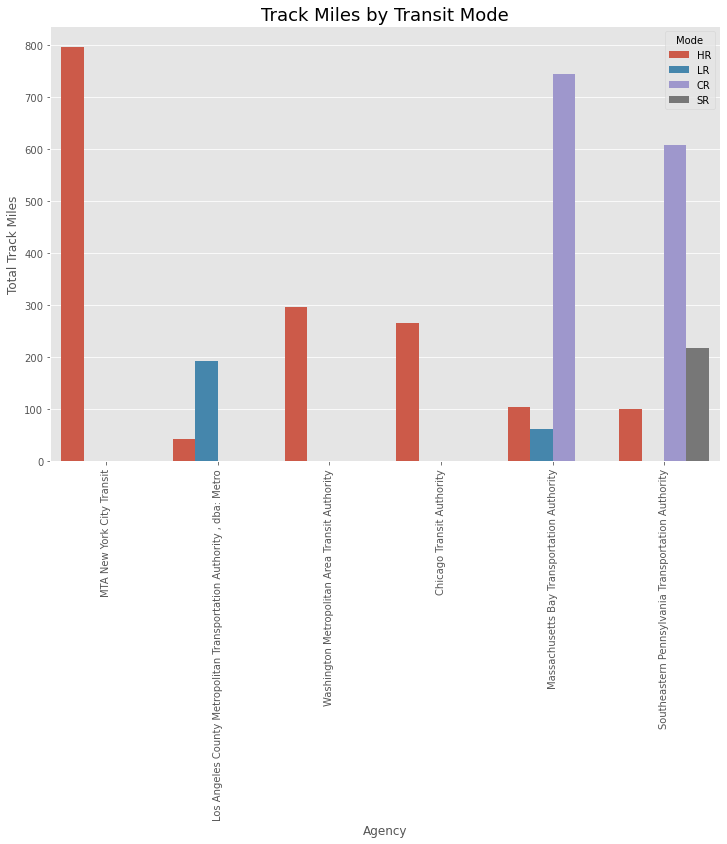

In [280]:
sns.barplot(data=df_track_miles, x='Agency', y='Total Track Miles', hue='Mode')
plt.title('Track Miles by Transit Mode', fontsize=18)
plt.xticks(rotation= 'vertical')
plt.show()

HR(Heavy Rail), LR(Light Rail), CR(Coummuter Rail), SR(Streetcar Rail). In terms of rails, NYCT has the most track miles in Heavy Rail while MBTA has the most track miles in Commuter Rail. CTA only uses Heavy Rail

## How many vehicles do each transit agencies have?

In [4]:
df_Revenue_Vehicle_Inventory = df1[df1['NTD ID'].isin([50066, 90154, 10003, 20008, 30019, 30030])]

In [182]:
df_Revenue_Vehicle_Inventory.head(5)

,NTD ID,Agency Name,Reporter Type,Reporting Module,Group Plan Sponsor NTD ID,Group Plan Sponsor Name,Modes,Revenue Vehicle Inventory ID,Agency Fleet ID,ModeTOS Vehicles Operated in Maximum Service,Total Fleet Vehicles,Dedicated Fleet,Vehicle Type,Ownership Type,Funding Source,Manufacture Year,Rebuild Year,Type of Last Renewal,Useful Life Benchmark,Manufacturer,Other Manufacturer Description,Model,Active Fleet Vehicles,ADA Fleet Vehicles,Emergency Contingency Vehicles,Fuel Type,Vehicle Length,Seating Capacity,Standing Capacity,Total Miles on Active Vehicles During Period,Average Lifetime Miles per Active Vehicles,No Capital Replacement Flag,Separate Asset Flag,Event Data Recorders,Emergency Lighting System Design,Emergency Signage,Emergency Path Marking,Automated Vehicles Flag,Notes
2356,10003,Massachusetts Bay Transportation Authority,Full Reporter,Urban,NaN,NaN,CR/PT,31683,NaN,436.0,25,Y,Commuter Rail Locomotive,Owned outright by public agency (OOPA),Other Federal Funds (OF),1988.0,2002.0,NaN,39.0,General Motors Corporation,NaN,F40PH-2C,17.0,17.0,0.0,Diesel Fuel,64.0,2,0.0,928514.0,1898139.0,NaN,N,17.0,17.0,17.0,17.0,NaN,NaN
2357,10003,Massachusetts Bay Transportation Authority,Full Reporter,Urban,NaN,NaN,CR/PT,31684,NaN,436.0,50,Y,Commuter Rail Passenger Coach,Owned outright by public agency (OOPA),Non-Federal Public Funds (NFPA),1989.0,NaN,NaN,39.0,Bombardier Corporation,NaN,BTC1B60053,49.0,49.0,0.0,NaN,85.0,122,75.0,3213939.0,1869670.0,NaN,N,49.0,49.0,49.0,49.0,NaN,NaN
2358,10003,Massachusetts Bay Transportation Authority,Full Reporter,Urban,NaN,NaN,CR/PT,31685,NaN,436.0,52,Y,Commuter Rail Passenger Coach,Owned outright by public agency (OOPA),Non-Federal Public Funds (NFPA),1989.0,NaN,NaN,39.0,Bombardier Corporation,NaN,CTC1B160052,51.0,51.0,0.0,NaN,85.0,122,75.0,3308286.0,2016144.0,NaN,N,52.0,52.0,52.0,52.0,NaN,NaN
2359,10003,Massachusetts Bay Transportation Authority,Full Reporter,Urban,NaN,NaN,CR/PT,31686,NaN,436.0,32,Y,Commuter Rail Passenger Coach,Owned outright by public agency (OOPA),Non-Federal Public Funds (NFPA),1987.0,NaN,NaN,39.0,M.B.B.,NaN,BTC350032,12.0,12.0,0.0,NaN,85.0,94,75.0,407239.0,1839950.0,NaN,N,32.0,32.0,32.0,32.0,NaN,NaN
2360,10003,Massachusetts Bay Transportation Authority,Full Reporter,Urban,NaN,NaN,CR/PT,31687,NaN,436.0,33,Y,Commuter Rail Passenger Coach,Owned outright by public agency (OOPA),Non-Federal Public Funds (NFPA),1987.0,NaN,NaN,39.0,M.B.B.,NaN,CTC3150033,14.0,14.0,0.0,NaN,85.0,96,75.0,590117.0,1839522.0,NaN,N,33.0,33.0,33.0,33.0,NaN,NaN


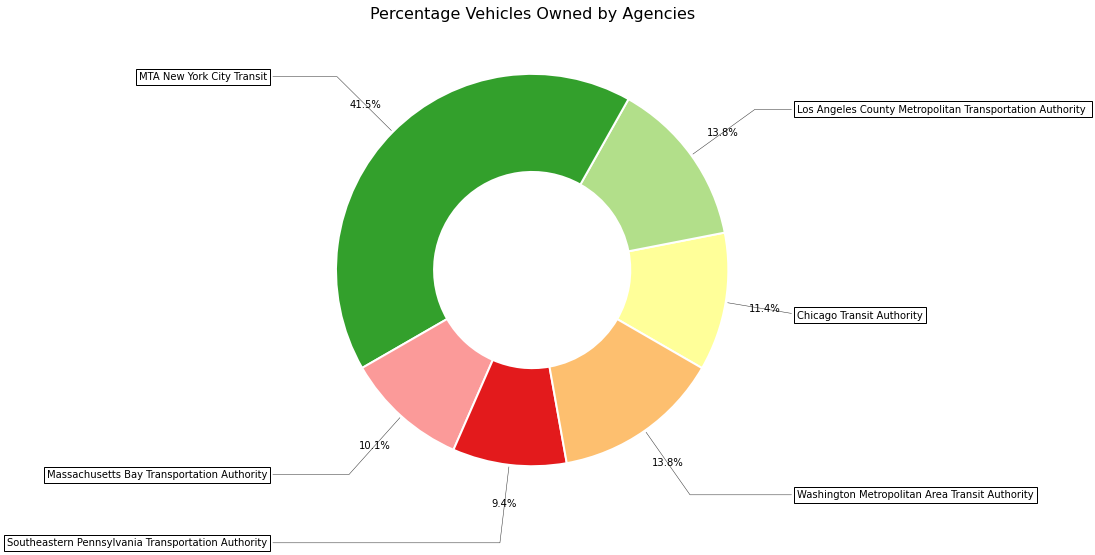

In [214]:
cmap = plt.get_cmap("Paired")
colors = cmap(np.array([10,2,3,4,5,6,7,8,9,1]))
labels =df_Revenue_Vehicle_Inventory.groupby('Agency Name').sum().index

fig, ax = plt.subplots(figsize = (12,8))
wedges, texts, autotexts = ax.pie(
           x=df_Revenue_Vehicle_Inventory.groupby('Agency Name').sum()['Total Fleet Vehicles'],
           startangle = -30,
           autopct = '%1.1f%%',
           wedgeprops={'width':0.5,'edgecolor': 'white','linewidth': 2},
           colors=colors,
           pctdistance = 1.2
          )

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1)
kw = dict(arrowprops=dict(arrowstyle="-", color = "0.2"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Percentage Vehicles Owned by Agencies', fontsize=16)
plt.tight_layout()

NYCT owns the most vehicles whereas CTA falls in 4th place

In [5]:
df_Revenue_Vehicle_Inventory.groupby(['Agency Name', 'Modes']).sum()['Total Fleet Vehicles']

Agency Name                                                Modes
Chicago Transit Authority                                  HR/DO    1485
                                                           MB/DO    2031
Los Angeles County Metropolitan Transportation Authority   HR/DO     104
                                                           LR/DO     298
                                                           MB/DO    2307
                                                           MB/PT     201
                                                           RB/DO      34
                                                           VP/PT    1307
MTA New York City Transit                                  CB/DO     503
                                                           DR/PT    1454
                                                           HR/DO    6714
                                                           MB/DO    3984
                                                           

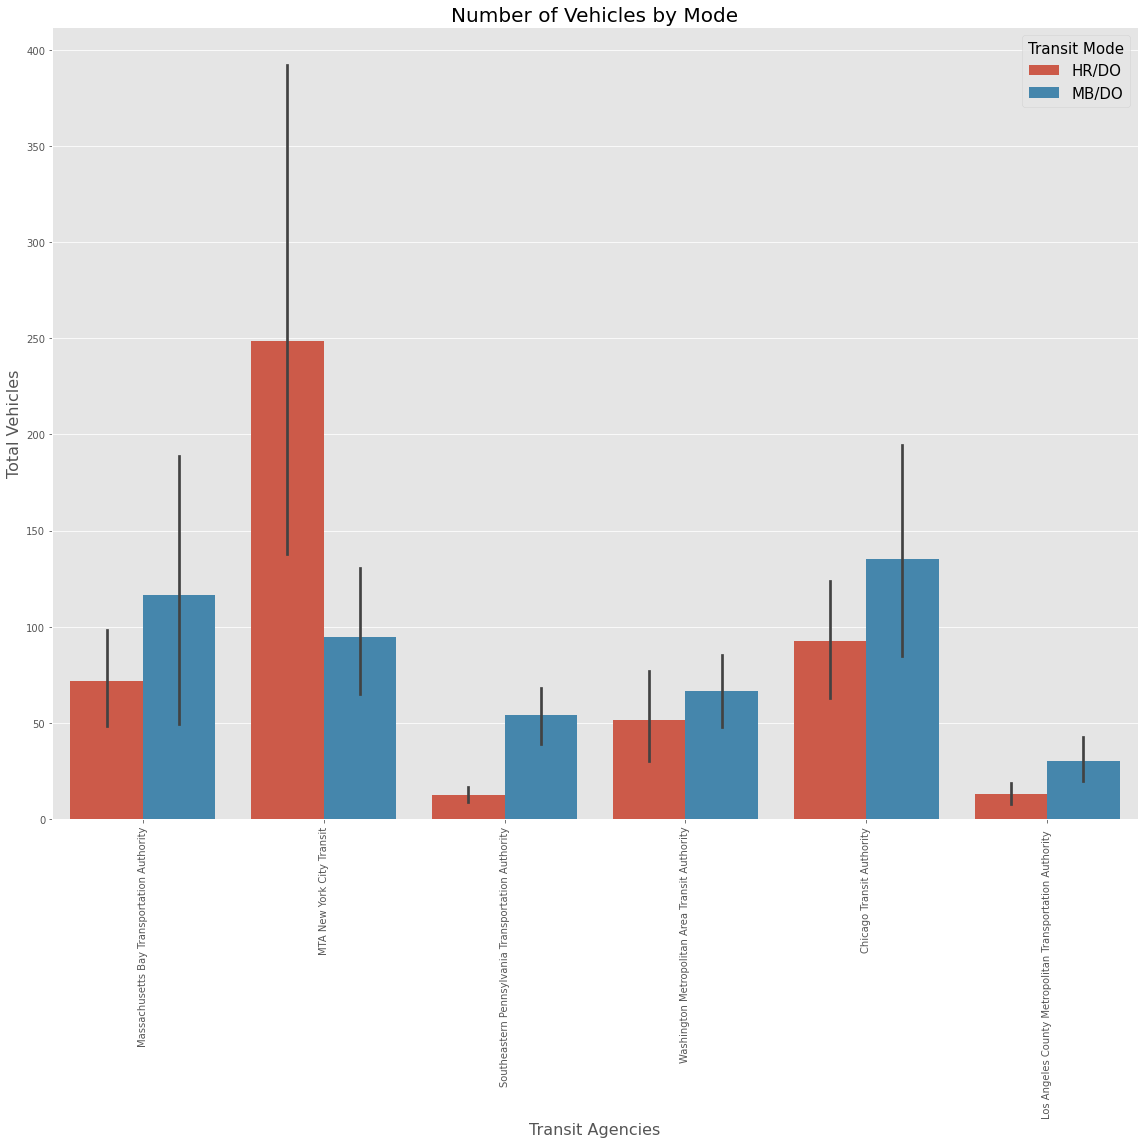

In [7]:
VehicleByMode=df_Revenue_Vehicle_Inventory[df_Revenue_Vehicle_Inventory['Modes'].isin(['HR/DO', 'MB/DO'])]

plt.figure(figsize = (16,16))
sns.barplot(data=VehicleByMode, x='Agency Name', y='Total Fleet Vehicles', hue='Modes')
plt.title('Number of Vehicles by Mode', fontsize = 20)
plt.xlabel('Transit Agencies', fontsize = 16)
plt.ylabel('Total Vehicles', fontsize = 16)
plt.xticks(rotation= 'vertical')
plt.legend(title = 'Transit Mode', fontsize=15, title_fontsize = 15)
plt.tight_layout()

Let's breakdown to HR and MB. NYCT owns the most Heavy Rail while CTA owns the most buses

## How old are the tracks?

In [8]:
df_Track_Age = pd.read_excel('Track Age.xlsx', index_col=None)
df_Track_Age.head(5)

,Years,Agency,Total Track Mileage
0,Pre 1940'S,Chicago Transit Authority,141.6
1,1940'S,Chicago Transit Authority,168.3
2,1950'S,Chicago Transit Authority,101.4
3,1960'S,Chicago Transit Authority,91.4
4,1970'S,Chicago Transit Authority,0.0


Text(0.5, 1.0, 'Age of the Tracks')

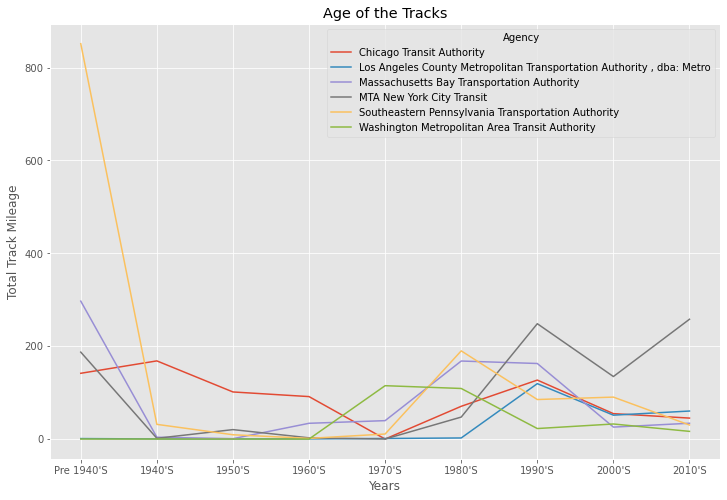

In [13]:
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.lineplot(data=df_Track_Age, x = 'Years', y = 'Total Track Mileage', hue='Agency')
plt.title('Age of the Tracks')

SEPTA has more old tracks while NYCT has more newer tracks.

## Who has the oldest station and who has the newest?

In [14]:
df_Station_Age = pd.read_excel('Station Age.xlsx', index_col=None)

In [15]:
df_Station_Age.head(5)

,Years,Agency,Total stations
0,Pre1940,Chicago Transit Authority,31
1,1940's,Chicago Transit Authority,13
2,1950's,Chicago Transit Authority,23
3,1960's,Chicago Transit Authority,26
4,1970's,Chicago Transit Authority,13


Text(0.5, 1.0, 'Age of the Stations')

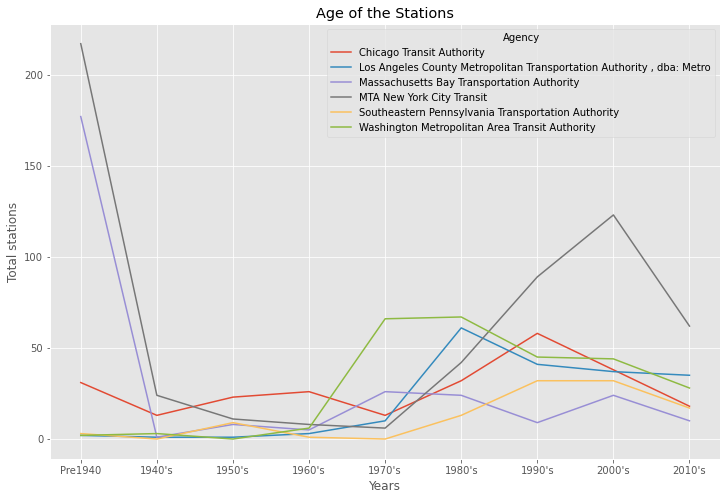

In [16]:
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.lineplot(data=df_Station_Age, x = 'Years', y = 'Total stations', hue='Agency')
plt.title('Age of the Stations')

Most of NYCT stations are old. Same as MBTA. NYCT also has the most new stations compared to other agencies. 

## Who has the oldest vehicles and who has the newest vehicles?

In [18]:
df_Vehicle_Age = pd.read_excel('Vehicles Age.xlsx', index_col=None)

In [22]:
df_Vehicle_Age.sort_values('Agency').head()

,Agency,NTD ID,Primary UZA Population,Agency VOMS,Vehicle Type,0,1,2,3,4,...,11,12,13-15,16-20,21-25,26-30,31-60,60+,Total Vehicles,Average Age Of Fleet (In Years)
21,Chicago Transit Authority,50066,8608208,2730,Articulated Bus,0,0,0,0,0,...,56,0,0,0,0,0,0,0,305,8.947541
45,Chicago Transit Authority,50066,8608208,2730,Trucks and other Rubber Tire Vehicles (Service),0,68,44,95,67,...,26,47,92,118,10,47,0,0,725,10.081379
46,Chicago Transit Authority,50066,8608208,2730,Steel Wheel Vehicles (Service),0,3,0,5,1,...,1,8,9,11,8,18,38,1,110,27.118182
47,Chicago Transit Authority,50066,8608208,2730,Automobiles (Service),0,0,0,0,6,...,0,1,7,12,0,0,0,0,31,12.612903
28,Chicago Transit Authority,50066,8608208,2730,Heavy Rail Passenger Car,0,0,0,0,111,...,0,0,0,0,0,255,493,0,1456,19.179258


Text(0.5, 1.0, 'Ages of Vehicles')

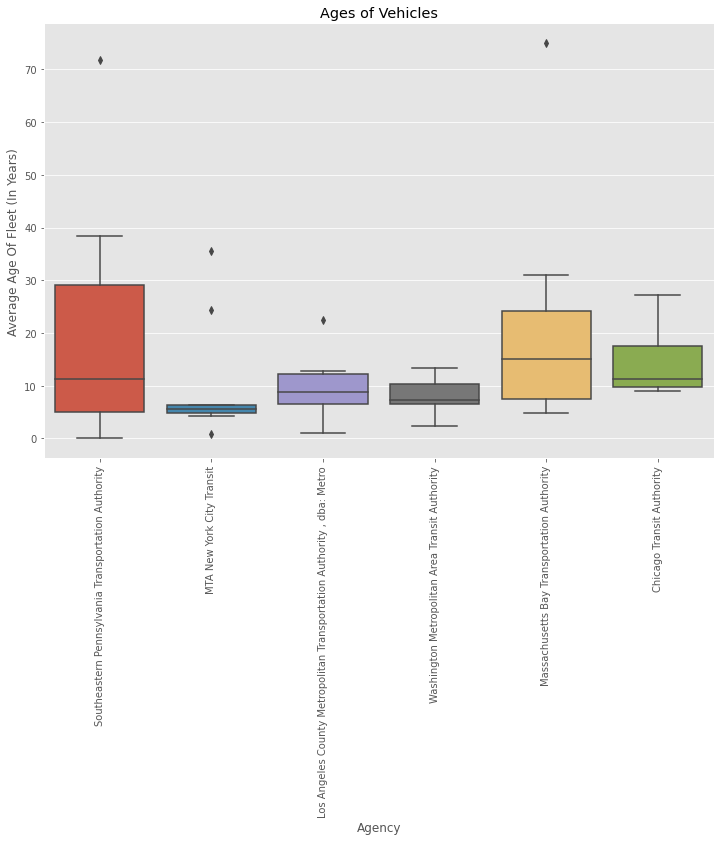

In [260]:
sns.boxplot(data=df_Vehicle_Age, x='Agency', y ='Average Age Of Fleet (In Years)')
plt.xticks(rotation= 'vertical')
plt.title('Ages of Vehicles')

SEPTA has an average of older vehicles. NYCT has an average of new vehicles

## What are the maintenance costs for CTA and other transit agencies?

In [80]:
df_Operating_Expenses = df4[df4['NTD ID'].isin([50066, 90154, 10003, 20008, 30019, 30030])]

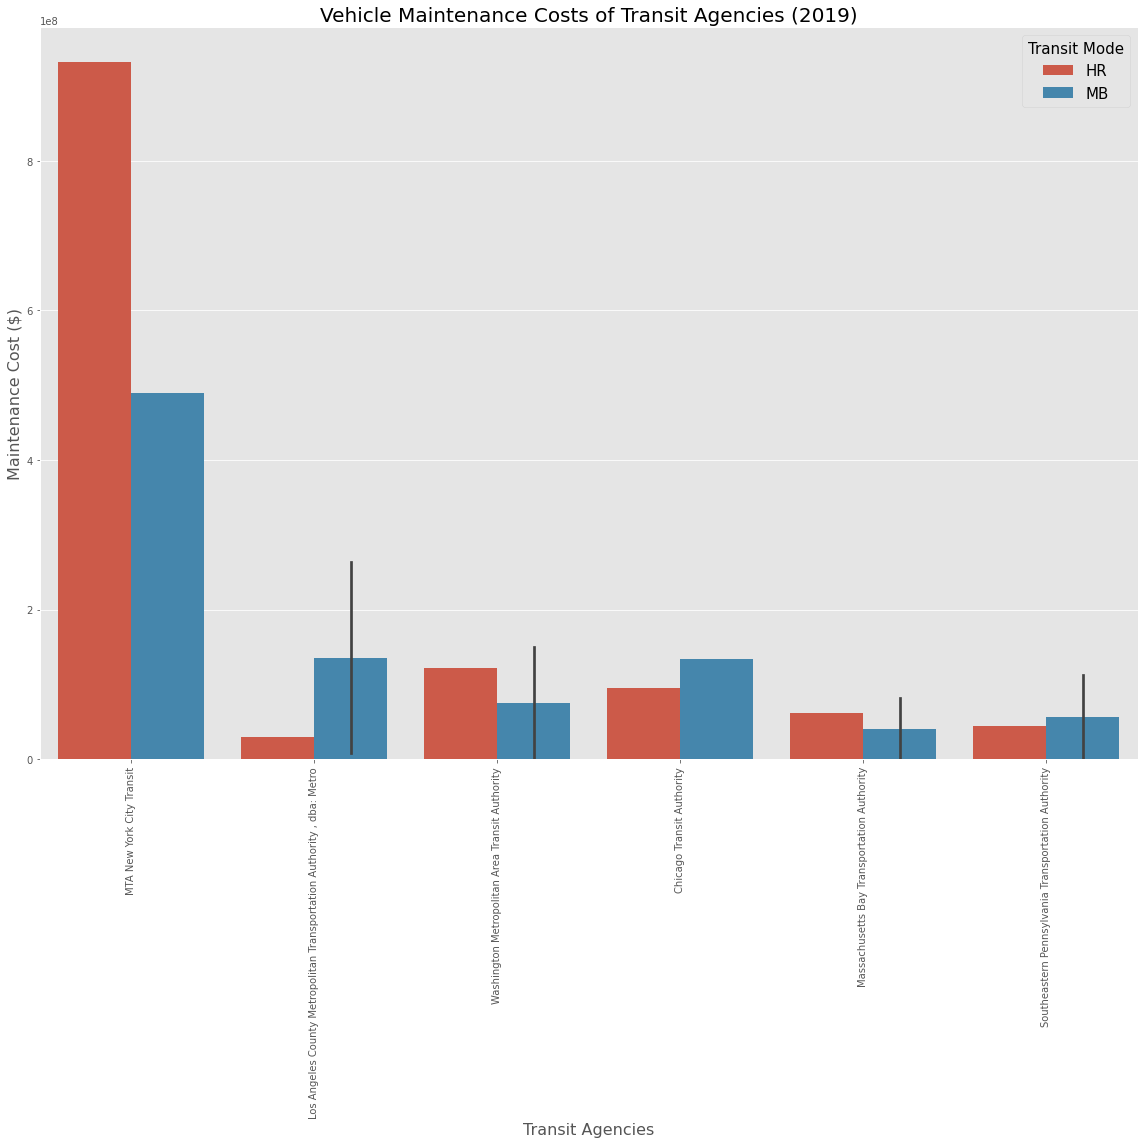

In [278]:
cost = df_Operating_Expenses[df_Operating_Expenses['Mode'].isin(['MB', 'HR'])]

plt.figure(figsize = (16,16))
sns.barplot(data = cost, x='Agency', y='Vehicle Maintenance', hue = 'Mode')
plt.title('Vehicle Maintenance Costs of Transit Agencies (2019)', fontsize = 20)
plt.xlabel('Transit Agencies', fontsize = 16)
plt.ylabel('Maintenance Cost ($)', fontsize = 16)
plt.xticks(rotation= 'vertical')
plt.legend(title = 'Transit Mode', fontsize=15, title_fontsize = 15)
plt.tight_layout()

NYCT has the most maintenance cost for both heavy rail and bus. CTA's maintenance costs are relatively high compared to LACMTA, MBTA and SEPTA

## Who has the most Fare Revenues?

In [313]:
xls = pd.ExcelFile('Metrics.xlsm')
df8 = pd.read_excel(xls, 'Metrics', index_col = None)

In [342]:
df_metrics = df8[df8['NTD ID'].isin([50066, 90154, 10003, 20008, 30019, 30030])]

In [343]:
df_metrics= df_metrics[df_metrics['Mode'].isin(['HR', 'MB'])]

In [344]:
df_metrics

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,TOS,Mode VOMS,Ratios:,Fare Revenues per Unlinked Passenger Trip,Fare Revenues per Unlinked Passenger Trip Questionable,Fare Revenues per Total Operating Expense (Recovery Ratio),Fare Revenues per Total Operating Expense (Recovery Ratio) Questionable,Cost per\n Hour,Cost per Hour Questionable,Passengers per Hour,Passengers per Hour Questionable,Cost per Passenger,Cost per Passenger Questionable,Cost per Passenger Mile,Cost per Passenger Mile Questionable,Source Data:,Fare Revenues Earned,Fare Revenues Earned Questionable,Total Operating Expenses,Total Operating Expenses Questionable,Unlinked Passenger Trips,Unlinked Passenger Trips Questionable,Vehicle Revenue Hours,Vehicle Revenue Hours Questionable,Passenger Miles,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
0,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295.0,10885.0,HR,DO,5413.0,NaN,1.3431,NaN,0.6997,NaN,267.9685,NaN,139.6021,NaN,1.9195,NaN,0.4976,NaN,NaN,3.643214e+09,NaN,5.206727e+09,NaN,2.712522e+09,NaN,19430373.0,NaN,1.046278e+10,NaN,354616371.0,NaN,No,NaN,NaN,NaN,Hide questionable data tags,NaN,NaN
2,MTA New York City Transit,New York,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,18351295.0,10885.0,MB,DO,3262.0,NaN,1.2234,NaN,0.3150,NaN,219.8702,NaN,56.6160,NaN,3.8835,NaN,1.8167,NaN,NaN,8.461117e+08,NaN,2.685918e+09,NaN,6.916166e+08,NaN,12215926.0,NaN,1.478430e+09,NaN,86233591.0,NaN,No,NaN,2.0,NaN,1,NaN,2.0
13,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,9154,90154,Independent Public Agency or Authority of Tran...,Full Reporter,12150996.0,3469.0,HR,DO,68.0,NaN,0.7296,NaN,0.1866,NaN,536.9939,NaN,137.3117,NaN,3.9108,NaN,0.8112,NaN,NaN,3.142658e+07,NaN,1.684534e+08,NaN,4.307428e+07,NaN,313697.0,NaN,2.076649e+08,NaN,6874200.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
16,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,9154,90154,Independent Public Agency or Authority of Tran...,Full Reporter,12150996.0,3469.0,MB,DO,1784.0,NaN,0.7150,NaN,0.1505,NaN,190.7456,NaN,40.1420,NaN,4.7518,NaN,1.1580,NaN,NaN,1.820292e+08,NaN,1.209707e+09,NaN,2.545802e+08,NaN,6341989.0,NaN,1.044645e+09,NaN,65595822.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
17,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,9154,90154,Independent Public Agency or Authority of Tran...,Full Reporter,12150996.0,3469.0,MB,PT,134.0,NaN,0.3128,NaN,0.0725,NaN,107.1191,NaN,24.8434,NaN,4.3118,NaN,0.8964,NaN,NaN,3.849877e+06,NaN,5.306690e+07,NaN,1.230745e+07,NaN,495401.0,NaN,5.920263e+07,NaN,5775759.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
19,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770.0,3391.0,MB,PT,93.0,NaN,3.0847,NaN,0.3677,NaN,174.6923,NaN,20.8259,NaN,8.3882,NaN,1.1209,NaN,NaN,3.720334e+06,NaN,1.008126e+07,NaN,1.206050e+06,NaN,57911.0,NaN,9.025834e+06,NaN,901961.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
20,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770.0,3391.0,HR,DO,920.0,NaN,2.3300,NaN,0.4795,NaN,303.3784,NaN,62.4315,NaN,4.8594,NaN,0.8471,NaN,NaN,5.335180e+08,NaN,1.112675e+09,NaN,2.289748e+08,NaN,3667616.0,NaN,1.313511e+09,NaN,85106645.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
23,Washington Metropolitan Area Transit Authority,Washington,DC,3030,30030,Independent Public Agency or Authority of Tran...,Full Reporter,4586770.0,3391.0,MB,DO,1286.0,NaN,0.9850,NaN,0.1666,NaN,193.6789,NaN,32.7687,NaN,5.9105,NaN,2.0133,NaN,NaN,1.202908e+08,NaN,7.218294e+08,NaN,1.221271e+08,NaN,3726938.0,NaN,3.585329e+08,NaN,36511319.0,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
32,Chicago Transit Authority,Chicago,IL,50

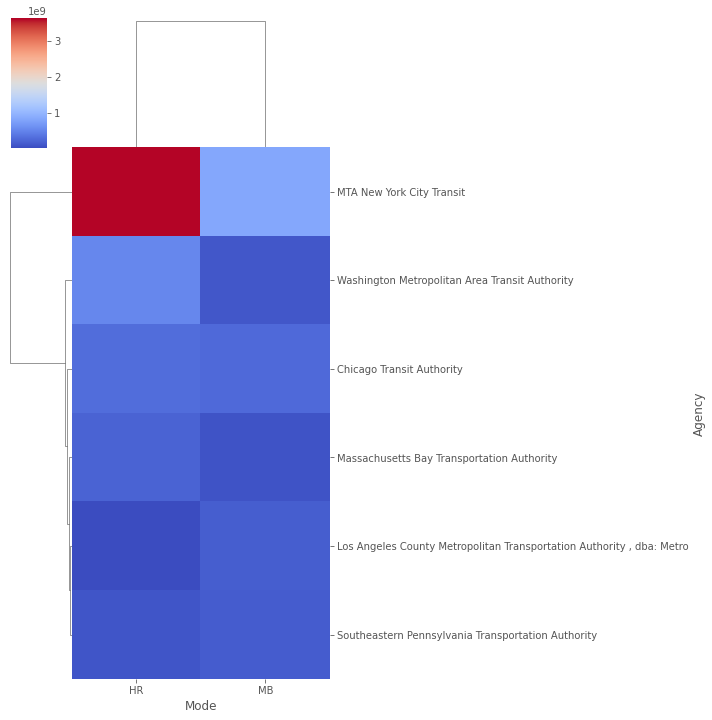

In [367]:
sns.clustermap(df_metrics.groupby(['Agency','Mode']).sum()['Fare Revenues Earned'].unstack(level=-1), cmap='coolwarm')

NYCT has the most fare revenue

## What do the transit agencies spend the money on?

In [52]:
df_Capital_Expenses = pd.read_excel('Capital Expense.xlsx', index_col=None)

In [71]:
df_Capital_Expenses.head(5)

,Agency,Type,Expense
0,MTA New York City Transit,Guideway,1004028766
1,MTA New York City Transit,Stations,989787720
2,MTA New York City Transit,Administrative Buildings,58777662
3,MTA New York City Transit,Maintenance Buildings,301122781
4,MTA New York City Transit,Passenger Vehicles,766754475


Text(0, 0.5, 'Total Expenses ($)')

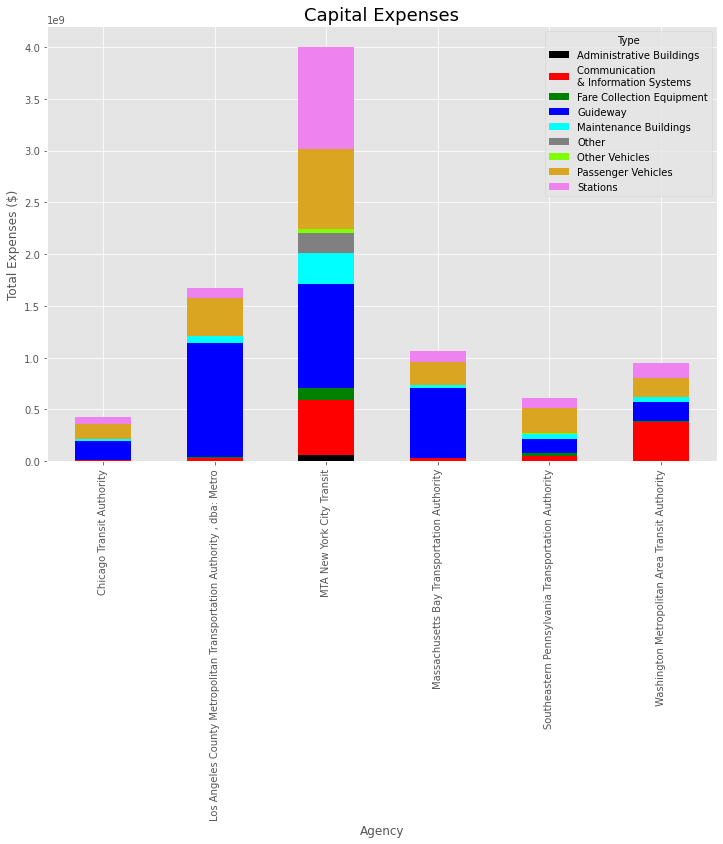

In [75]:
df_Capital_Expenses.groupby(['Agency','Type'])['Expense'].sum().unstack().plot(kind='bar', stacked=True, 
                                                                               color=['black', 'red', 'green', 'blue', 'cyan', 'grey','chartreuse', 'goldenrod', 'violet'])
plt.title('Capital Expenses', fontsize=18)
plt.ylabel('Total Expenses ($)')

CTA has the least capital expenses compared to other transit agencies. NYCT has the most capital expenses, and spent mostly on stations and guideway. The agencies spent their money mostly on passenger vehicles and guideway except WMATA spent fairly on it.